# CMSE 201 Final Project Template

#### CMSE 201 Final Project
### &#9989; Paul Schmidt
### &#9989; Section_007
#### &#9989; 11/27/24

# ___Crop Yield Changes Associated with Climate Change___

## Background and Motivation

Climate Change is a growing problem in the world today. From rising sea levels to severe weather, climate change has many profound effects worldwide. One of the often ignored effects of climate change is the decreased landspace that can be farmed. With a continually growing world population, decreased crop production could lead to food scarcity, and increased starvation worldwide that would disproportionately affect poorer countries. The question that I will attempt to answer is "How will climate change affect crop production in the future?" In this project I will model how different responses to climate change will affect the future food production of 3 major crops namely rice, maize, and wheat. 

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

The data that I used contained four different estimates based on four different scenarios published by the Intergovernmental Panel on Climate Change or IPCC, which is an arm of the United Nations. The scenarios laid out by the IPCC were catagorized into four main "families" of scenarios. 

1. The A1 family of scenarios describes a globalized world that is characterized by a globally shared increase in economic growth with introductions of new technologies. While the IPCC divides this scenario into 3 sub cases, the case that is used in the data is A1FI which states that the new technologies will be fossil fuel intensive. 

2. The A2 family of scenarios also details a world with rapid economic growth similar to A1. However, the economic growth and new technologies are more regional.
  
3. The B1 family of scenarios details a globalized world with an emphasis on global solutions to economic and environmental sustainability. 

4. Lastly the B2 family of scenarios focuses on a family of scenarios where with an emphasis on local solutions to economic and environmental sustainability.



In [352]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read in the estimated data from 2020-2080 for the different scenarios
estimate_data = pd.read_csv("Agriculture_climate_change data.csv",delimiter=',',skiprows=0)

#read in the recent crop data for maize, rice, & wheat from 2001-2022
historical_data = pd.read_csv("FAO_MRW_2001_2022.csv",delimiter=',',skiprows=0)

#change the indexs so I can index based on country
estimate_data = estimate_data.set_index(estimate_data.iloc[:,0])
estimate_data.head()

,BLS_2_Countries_(SRES)_ABBREVNAME,Fips_code,ISO3v10,WH_2000,RI_2000,MZ_2000,WHA1F2020,RIA1F2020,MZA1F2020,ActChWHA1F2020,...,A2C2080,B1A2020,B1A2050,B1A2080,B2A2020,B2A2050,B2A2080,B2B2020,B2B2050,B2B2080
BLS_2_Countries_(SRES)_ABBREVNAME,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,AF,AFG,2750142.86,337285.71,265285.71,-1.22,-3.22,-5.54,NaN,...,-2.08,-0.51,-0.83,-1.48,-0.99,-1.69,-1.90,-0.74,-0.95,-3.49
Alaska (same as Canada),Alaska (same as Canada),02,USA,NaN,NaN,NaN,6.53,4.53,-0.03,NaN,...,2.90,0.65,1.16,0.89,0.39,1.17,1.58,0.75,0.40,0.77
Albania,Albania,AL,ALB,274685.71,NaN,212814.29,4.19,2.19,-1.68,11520.95,...,2.58,0.05,0.57,0.81,0.30,0.49,1.14,0.21,0.56,1.45
Algeria,Algeria,AG,DZA,2157083.86,300.00,1249.14,1.35,-0.65,-4.30,NaN,...,-2.37,0.11,0.24,-0.22,-0.29,-0.87,-1.60,0.08,0.05,-3.42
Angola,Angola,AO,AGO,4000.00,7791.57,543685.29,1.35,-0.65,-4.30,NaN,...,-5.41,-1.60,-2.36,-3.21,-2.41,-3.43,-4.35,-1.81,-2.53,-6.43


I compared the predicted maize production for the United States under each of the four scenarios. I then repeated this process for rice production in China and wheat production in India. 

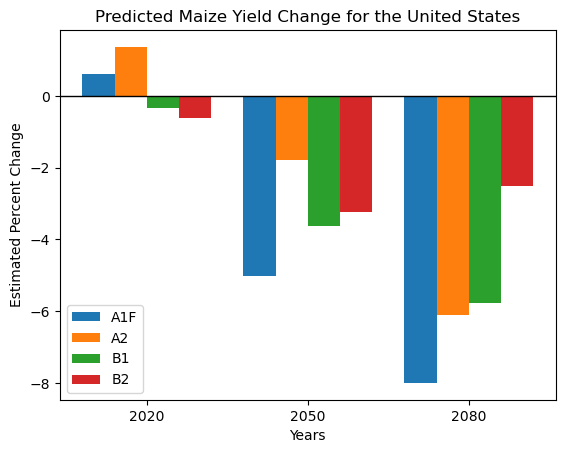

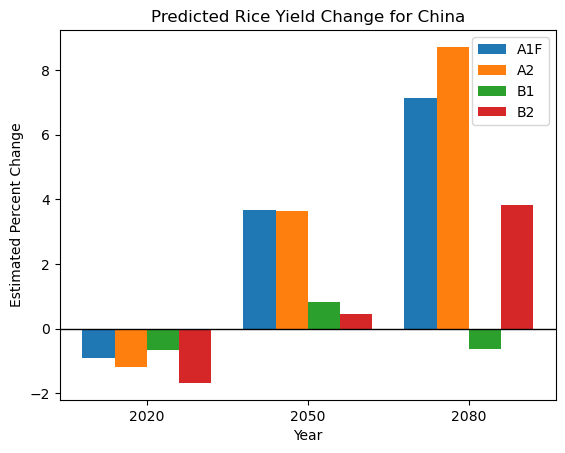

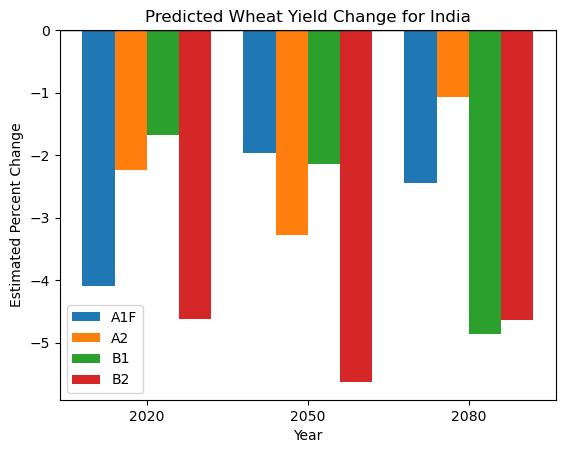

In [354]:
time_e = [2020,2050,2080]

#collect MaizeData for United States
us_maize_A1F = [float(estimate_data.loc["United States", "MZA1F2020"]), float(estimate_data.loc["United States", "MZA1F2050"]), float(estimate_data.loc["United States", "MZA1F2080"])]
us_maize_A2 = [float(estimate_data.loc["United States", "MZA2a2020"]), float(estimate_data.loc["United States", "MZA2a2050"]), float(estimate_data.loc["United States", "MZA2a2080"])]
us_maize_B1 = [float(estimate_data.loc["United States", "MZB1a2020"]), float(estimate_data.loc["United States", "MZB1a2050"]), float(estimate_data.loc["United States", "MZB1a2080"])]
us_maize_B2 = [float(estimate_data.loc["United States", "MZB2a2020"]), float(estimate_data.loc["United States", "MZB2a2050"]), float(estimate_data.loc["United States", "MZB2a2080"])]


#Collect RiceData for China

china_rice_A1F = [float(estimate_data.loc["China", "RIA1F2020"]), float(estimate_data.loc["China", "RIA1F2050"]), float(estimate_data.loc["China", "RIA1F2080"])]
china_rice_A2 = [float(estimate_data.loc["China", "RIA2a2020"]), float(estimate_data.loc["China", "RIA2a2050"]), float(estimate_data.loc["China", "RIA2a2080"])]
china_rice_B1 = [float(estimate_data.loc["China", "RIB1a2020"]), float(estimate_data.loc["China", "RIB1a2050"]), float(estimate_data.loc["China", "RIB1a2080"])]
china_rice_B2 = [float(estimate_data.loc["China", "RIB2a2020"]), float(estimate_data.loc["China", "RIB2a2050"]), float(estimate_data.loc["China", "RIB2a2080"])]

#Collect WheatData for India
india_wheat_A1F = [float(estimate_data.loc["India", "WHA1F2020"]), float(estimate_data.loc["India", "WHA1F2050"]), float(estimate_data.loc["India", "WHA1F2080"])]
india_wheat_A2 = [float(estimate_data.loc["India", "WHA2a2020"]), float(estimate_data.loc["India", "WHA2a2050"]), float(estimate_data.loc["India", "WHA2a2080"])]
india_wheat_B1 = [float(estimate_data.loc["India", "WHB1a2020"]), float(estimate_data.loc["India", "WHB1a2050"]), float(estimate_data.loc["India", "WHB1a2080"])]
india_wheat_B2 = [float(estimate_data.loc["India", "WHB2a2020"]), float(estimate_data.loc["India", "WHB2a2050"]), float(estimate_data.loc["India", "WHB2a2080"])]


# Positions for the bars (creating an offset for grouping)
x = np.arange(len(time_e))

# Width of the bars
bar_width = 0.20

# Plotting the United States' maize estimates
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, us_maize_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, us_maize_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, us_maize_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, us_maize_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Years')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Predicted Maize Yield Change for the United States')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting China's Rice Estimates
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, china_rice_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, china_rice_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, china_rice_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, china_rice_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Predicted Rice Yield Change for China')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, india_wheat_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, india_wheat_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, india_wheat_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, india_wheat_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Predicted Wheat Yield Change for India')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

Here I calculated the average percent change over all countries and plotted them. 

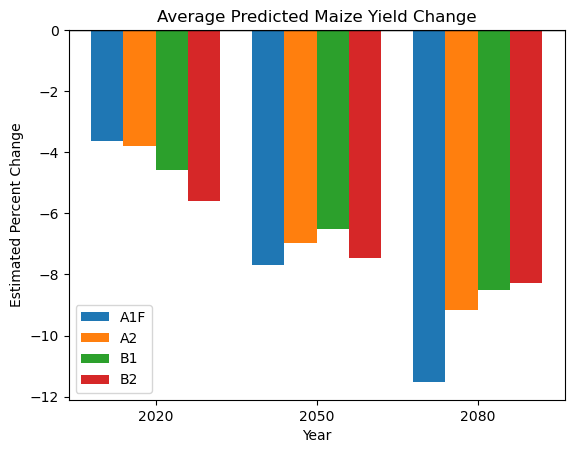

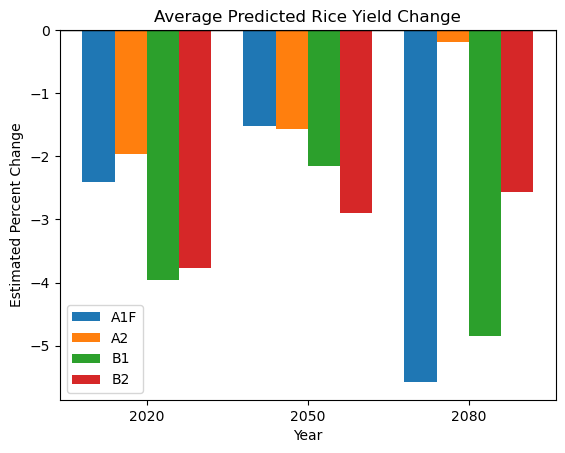

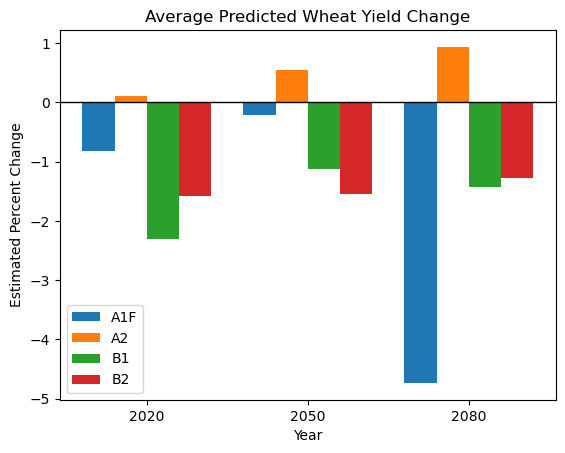

In [356]:
time_e = [2020,2050,2080]

#Gathering the average maize changes over all countries for each model
avg_maize_A1F = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA1F2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA1F2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA1F2080"]).mean()]
avg_maize_A2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZA2a2080"]).mean()]
avg_maize_B1 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB1a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB1a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB1a2080"]).mean()]
avg_maize_B2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "MZB2a2080"]).mean()]

#Gathering the average maize changes over all countries for each mod
avg_rice_A1F = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA1F2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA1F2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA1F2080"]).mean()]
avg_rice_A2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIA2a2080"]).mean()]
avg_rice_B1 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB1a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB1a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB1a2080"]).mean()]
avg_rice_B2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "RIB2a2080"]).mean()]

#Gathering the average maize changes over all countries for each model
avg_wheat_A1F = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA1F2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA1F2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA1F2080"]).mean()]
avg_wheat_A2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHA2a2080"]).mean()]
avg_wheat_B1 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB1a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB1a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB1a2080"]).mean()]
avg_wheat_B2 = [pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB2a2020"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB2a2050"]).mean(),pd.to_numeric(estimate_data.loc[:"Zimbabwe", "WHB2a2080"]).mean()]

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_maize_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_maize_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_maize_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_maize_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Maize Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_rice_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_rice_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_rice_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_rice_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Rice Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_wheat_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_wheat_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_wheat_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_wheat_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Wheat Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

I looked at the contemporary data for the maize, rice, and wheat production to compare against the predictions

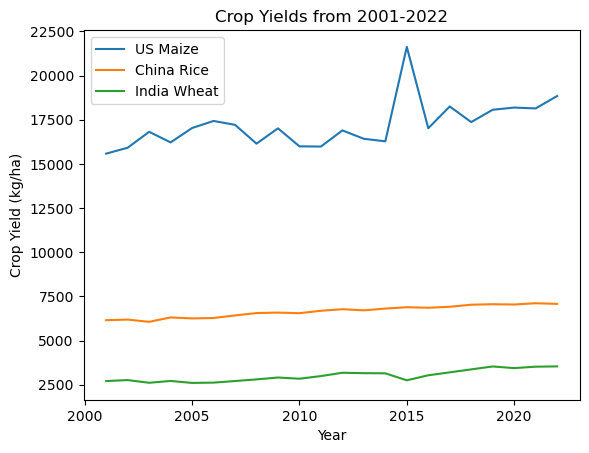

In [358]:
historical_data.head()
time = []
maize = []
rice = []
wheat = []

#gather maize data from the US
for i in np.arange(6020,6042,1):
    time.append(historical_data.loc[i, "Year"])
    maize.append(historical_data.loc[i, "Value"])
    
#gather rice data from China
for i in np.arange(1167,1189,1):
    rice.append(historical_data.loc[i, "Value"])
    
#gather wheat data from India
for i in np.arange(2565,2587,1):
    wheat.append(historical_data.loc[i, "Value"])
    
#Plot the three data sets in a line plot together
plt.plot(time, maize, label = "US Maize")
plt.plot(time, rice, label = "China Rice")
plt.plot(time, wheat, label = "India Wheat")
plt.xlabel("Year")
plt.ylabel("Crop Yield (kg/ha)")
plt.title("Crop Yields from 2001-2022")
plt.legend()
plt.show()



## Results

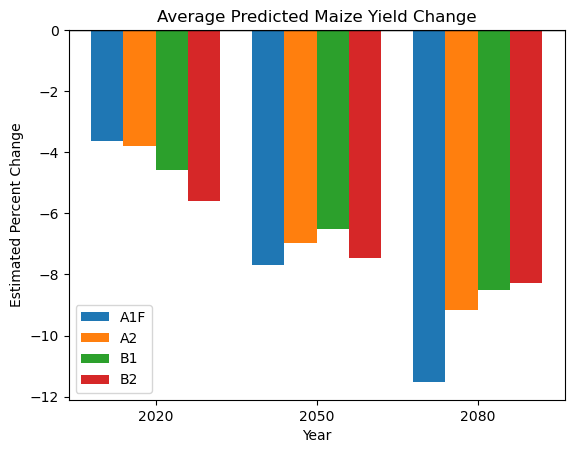

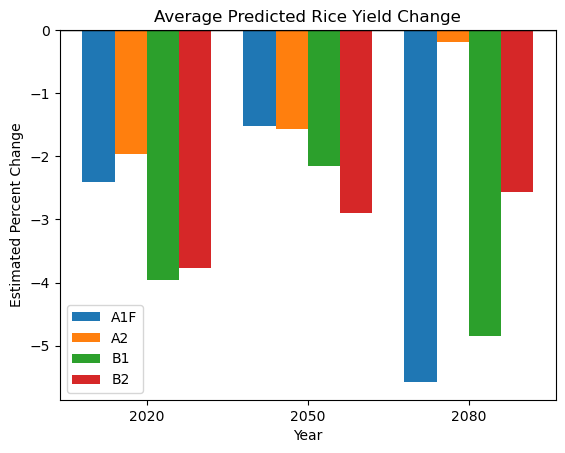

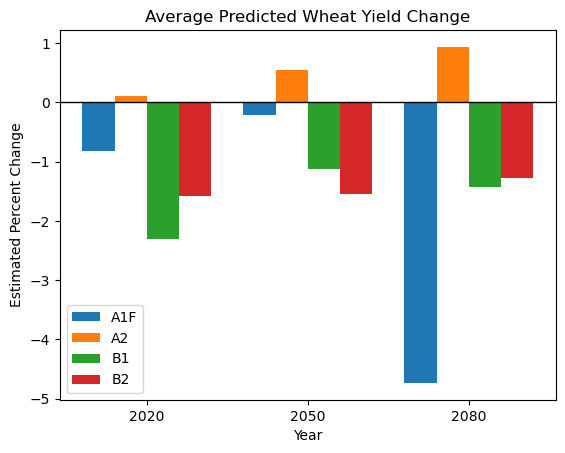

In [360]:
# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_maize_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_maize_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_maize_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_maize_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Maize Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_rice_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_rice_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_rice_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_rice_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Rice Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

# Plotting
fig, ax = plt.subplots()

# Plot the 4 bars
ax.bar(x - 3 * bar_width/2, avg_wheat_A1F, bar_width, label = "A1F")
ax.bar(x - bar_width/2, avg_wheat_A2, bar_width, label = "A2")
ax.bar(x + bar_width/2, avg_wheat_B1, bar_width, label = "B1")
ax.bar(x + 3 * bar_width/2, avg_wheat_B2, bar_width, label = "B2")
# Add a horizontal line at y=0
ax.axhline(0, color='black', linewidth=1)

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Estimated Percent Change')
ax.set_title('Average Predicted Wheat Yield Change')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(time_e)
ax.legend()
# Show plot
plt.show()

In [361]:
#Calculate the percent differences from the actual data for the three countries
pct_maize = (float(maize[19])-float(maize[0]))/float(maize[0])
pct_rice = (float(rice[19])-float(rice[0]))/float(rice[0])
pct_wheat = (float(wheat[19])-float(wheat[0]))/float(wheat[0])

print(pct_maize)
print(pct_rice)
print(pct_wheat)

maize_diffs = [pct_maize - us_maize_A1F[0], pct_maize - us_maize_A2[0], pct_maize - us_maize_B1[0], pct_maize - us_maize_B2[0]]
rice_diffs = [pct_rice - china_rice_A1F[0], pct_rice - china_rice_A2[0], pct_rice - china_rice_B1[0], pct_rice - china_rice_B2[0]]
wheat_diffs = [pct_wheat - india_wheat_A1F[0], pct_wheat - india_wheat_A2[0], pct_wheat - india_wheat_B1[0], pct_wheat - india_wheat_B2[0]]
print(maize_diffs)
print(rice_diffs)
print(wheat_diffs)

0.16734057301293898
0.14430141083154546
0.27018943170488546
[-0.452659426987061, -1.2026594269870612, 0.487340573012939, 0.777340573012939]
[1.0643014108315456, 1.3243014108315454, 0.8143014108315455, 1.8243014108315454]
[4.370189431704885, 2.5001894317048854, 1.9501894317048853, 4.8901894317048855]


In [362]:
print("The average maize percentage decrease of the A1F model was",avg_maize_A1F[2]/avg_maize_B2[2],"times larger than that of the B2 model")
print("The average rice percentage decrease of the A1F model was",avg_rice_A1F[2]/avg_rice_B2[2],"times larger than that of the B2 model")
print("The average wheat percentage decrease of the A1F model was",avg_wheat_A1F[2]/avg_wheat_B2[2],"times larger than that of the B2 model")

print("The average percentage decrease for all crops of the A1F model was",(avg_maize_A1F[2]/avg_maize_B2[2]+avg_rice_A1F[2]/avg_rice_B2[2]+avg_wheat_A1F[2]/avg_wheat_B2[2])/3,"times larger than that of the B2 model")

The average maize percentage decrease of the A1F model was 1.3893617959687734 times larger than that of the B2 model
The average rice percentage decrease of the A1F model was 2.17521580937433 times larger than that of the B2 model
The average wheat percentage decrease of the A1F model was 3.7017217532312694 times larger than that of the B2 model
The average percentage decrease for all crops of the A1F model was 2.4220997861914575 times larger than that of the B2 model


_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

In each of the four scenarios, the average global yield of maize, rice, and wheat production slightly decreases. The only exception occurs in the A2 scenario for wheat where the production slightly increases. This production increase is based on the predicted potentially positive increase in farmability of these crops with an increased CO2 concentration.

Looking at the percentage change differences from the predicted data and the actual data between 2000 and 2020 we can see, at least for the sample of 3 countries and their crops, that the percentage change from 2000 to 2020 most closely follows that of the B1 scenario. However, the impacts more severe further in the future. Furthermore, the sample size is not large enough to draw any definitive conclusions from these short term data.

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

Each of the four models predicts a decrease in the average global yield of maize, rice, and wheat production in the future associated with climate change. From my results, the A1FI model predicts the largest decrease in crop yield over the 80 year time period from 2000 to 2080. On average the B2 model has less than half of the decrease than the A1FI model. However it is uncertain how close any of the models will be to the actual change in crop yields as the recent data from 2000 to 2022 did not show much change. 

Some obstacles I ran into was how to parse these data. The data had long, albiet descriptive names, and the indices that I wanted to access were not conducive to splicing. To get around this challenge, I had to write long lines of code to access the necessary variables. Since the number of variables I needed to access was relatively low, this was not too problematic, but had I needed more variables, I would probably need to change around the ordering of the data to accomodate this. Another issue that I ran into was creating the grouped bar graphs. I tried to use the official documentation to no avail before resorting to using chatgpt to help with it.

For next time I think I would choose a more specific question for my topic. When trying to answer such a general question, it is very difficult to pin down what is needed to answer such a question. By choosing a narrower, more specific question, one can gain greater insight to the larger question without needing to consider as much information. 

### References

- Special Report on Emissions Scenarios - IPCC, 2000, www.ipcc.ch/site/assets/uploads/2018/03/sres-en.pdf. 

- https://www.fao.org/faostat/en/#data/QCL

- “Pandas.To_numeric#.” Pandas.To_numeric - Pandas 2.2.3 Documentation, 2024, pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric. 

- Chat-GPT for plotting help